In [5]:
%pylab inline
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [6]:
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv("../data/test.csv")
all_data = pd.concat([train_data, test_data])

In [7]:
all_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [8]:
all_data.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [9]:
all_data.groupby(['Pclass']).size()

Pclass
1    323
2    277
3    709
dtype: int64

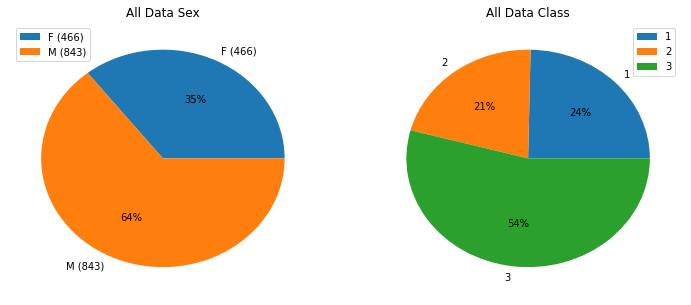

In [10]:
plt.figure(figsize(12, 5))

ax = plt.subplot(1,2,1)
group_by_sex = all_data.groupby(['Sex']).size()
plt.pie(group_by_sex, labels=['F (' + str(group_by_sex['female']) + ')', 'M (' + str(group_by_sex['male']) + ')'], autopct='%i%%')
plt.title("All Data Sex")
pylab.legend(loc=2)

ax = plt.subplot(1,2,2)
group_by_class = all_data.groupby(['Pclass']).size()
plt.pie(group_by_class, labels=['1', '2' , '3'], autopct='%i%%')
plt.title("All Data Class")
pylab.legend()

pylab.show()

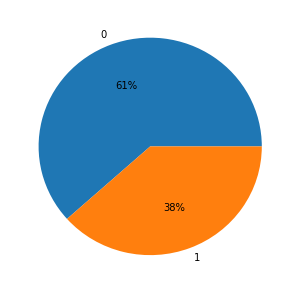

In [11]:
plt.figure(figsize(5, 5))

group_by_survived = train_data.groupby(['Survived']).size()
plt.pie(group_by_survived, labels = group_by_survived.index, autopct='%i%%')

pylab.show()

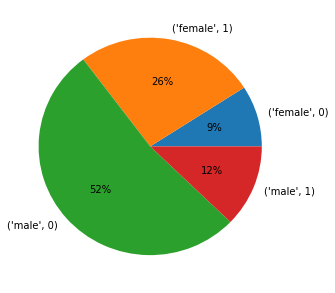

In [12]:
plt.figure(figsize(5, 5))

group_by_survived = train_data.groupby(['Sex', 'Survived']).size()
plt.pie(group_by_survived, labels = group_by_survived.index, autopct='%i%%')

pylab.show()

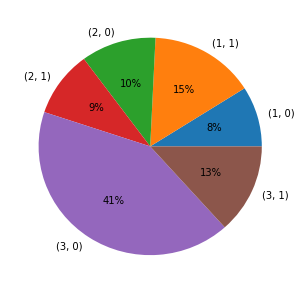

In [13]:
plt.figure(figsize(5, 5))

group_by_survived = train_data.groupby(['Pclass', 'Survived']).size()
plt.pie(group_by_survived, labels = group_by_survived.index, autopct='%i%%')

pylab.show()

In [14]:
train_data.groupby(["Pclass", "Sex"])["Survived"].value_counts(normalize=True)

Pclass  Sex     Survived
1       female  1           0.968085
                0           0.031915
        male    0           0.631148
                1           0.368852
2       female  1           0.921053
                0           0.078947
        male    0           0.842593
                1           0.157407
3       female  0           0.500000
                1           0.500000
        male    0           0.864553
                1           0.135447
Name: Survived, dtype: float64

In [41]:
class1_boy_age_mean = round(all_data.loc[(all_data['Name'].str.contains("Master.")) & (all_data['Sex'] == 'male') & (all_data['Pclass'] == 1) & (all_data.Age.notnull())].Age.mean())
class2_boy_age_mean = round(all_data.loc[(all_data['Name'].str.contains("Master.")) & (all_data['Sex'] == 'male') & (all_data['Pclass'] == 2) & (all_data.Age.notnull())].Age.mean())
class3_boy_age_mean = round(all_data.loc[(all_data['Name'].str.contains("Master.")) & (all_data['Sex'] == 'male') & (all_data['Pclass'] == 3) & (all_data.Age.notnull())].Age.mean())

class1_boy_ids = all_data.loc[(all_data['Name'].str.contains("Master.")) & (all_data['Sex'] == 'male') & (all_data['Pclass'] == 1) & (all_data.Age.notnull())].PassengerId
class2_boy_ids = all_data.loc[(all_data['Name'].str.contains("Master.")) & (all_data['Sex'] == 'male') & (all_data['Pclass'] == 2) & (all_data.Age.notnull())].PassengerId
class3_boy_ids = all_data.loc[(all_data['Name'].str.contains("Master.")) & (all_data['Sex'] == 'male') & (all_data['Pclass'] == 3) & (all_data.Age.notnull())].PassengerId

In [43]:
class1_male_age_mean = round(all_data.loc[(all_data['Sex'] == 'male') & (all_data['Pclass'] == 1) & (~all_data.PassengerId.isin(class1_boy_ids)) & (all_data.Age.notnull())].Age.mean())
class2_male_age_mean = round(all_data.loc[(all_data['Sex'] == 'male') & (all_data['Pclass'] == 2) & (~all_data.PassengerId.isin(class2_boy_ids)) & (all_data.Age.notnull())].Age.mean())
class3_male_age_mean = round(all_data.loc[(all_data['Sex'] == 'male') & (all_data['Pclass'] == 3) & (~all_data.PassengerId.isin(class3_boy_ids)) & (all_data.Age.notnull())].Age.mean())

In [65]:
class1_girl_age_mean = round(all_data.loc[(all_data['Sex'] == 'female') & (all_data['Pclass'] == 1) & (all_data.Age < 16) & (all_data.Parch > 0) & (all_data.Age.notnull())].Age.mean())
class2_girl_age_mean = round(all_data.loc[(all_data['Sex'] == 'female') & (all_data['Pclass'] == 1) & (all_data.Age < 16) & (all_data.Parch > 0) & (all_data.Age.notnull())].Age.mean())
class3_girl_age_mean = round(all_data.loc[(all_data['Sex'] == 'female') & (all_data['Pclass'] == 1) & (all_data.Age < 16) & (all_data.Parch > 0) & (all_data.Age.notnull())].Age.mean())

class1_girl_ids = all_data.loc[(all_data['Sex'] == 'female') & (all_data['Pclass'] == 1) & (all_data.Age < 16) & (all_data.Parch > 0) & (all_data.Age.notnull())].PassengerId
class2_girl_ids = all_data.loc[(all_data['Sex'] == 'female') & (all_data['Pclass'] == 2) & (all_data.Age < 16) & (all_data.Parch > 0) & (all_data.Age.notnull())].PassengerId
class3_girl_ids = all_data.loc[(all_data['Sex'] == 'female') & (all_data['Pclass'] == 3) & (all_data.Age < 16) & (all_data.Parch > 0) & (all_data.Age.notnull())].PassengerId

In [75]:
class1_female_age_mean = round(all_data.loc[(all_data['Sex'] == 'female') & (all_data['Pclass'] == 1) & (~all_data.PassengerId.isin(class1_girl_ids)) & (all_data.Age.notnull())].Age.mean())
class2_female_age_mean = round(all_data.loc[(all_data['Sex'] == 'female') & (all_data['Pclass'] == 2) & (~all_data.PassengerId.isin(class2_girl_ids)) & (all_data.Age.notnull())].Age.mean())
class3_female_age_mean = round(all_data.loc[(all_data['Sex'] == 'female') & (all_data['Pclass'] == 3) & (~all_data.PassengerId.isin(class3_girl_ids)) & (all_data.Age.notnull())].Age.mean())

In [91]:
all_data[all_data.Name.str.contains("Rev. ")]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
149,42.0,NaN,S,13.000,"Byles, Rev. Thomas Roussel Davids",0,150,2,male,0,0.0,244310
150,51.0,NaN,S,12.525,"Bateman, Rev. Robert James",0,151,2,male,0,0.0,S.O.P. 1166
249,54.0,NaN,S,26.000,"Carter, Rev. Ernest Courtenay",0,250,2,male,1,0.0,244252
626,57.0,NaN,Q,12.350,"Kirkland, Rev. Charles Leonard",0,627,2,male,0,0.0,219533
848,28.0,NaN,S,33.000,"Harper, Rev. John",1,849,2,male,0,0.0,248727
886,27.0,NaN,S,13.000,"Montvila, Rev. Juozas",0,887,2,male,0,0.0,211536
149,30.0,NaN,S,26.000,"Lahtinen, Rev. William",1,1041,2,male,1,NaN,250651
164,41.0,NaN,S,13.000,"Peruschitz, Rev. Joseph Maria",0,1056,2,male,0,NaN,237393
